<a href="https://colab.research.google.com/github/d33pd/fraud-detection/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

cd = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
print(cd.head() )


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [10]:
print(cd.isnull().sum())
print(cd.describe())
print(cd.info())
print(cd.shape)

print(cd['Amount'].describe())

print(cd['Class'].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027

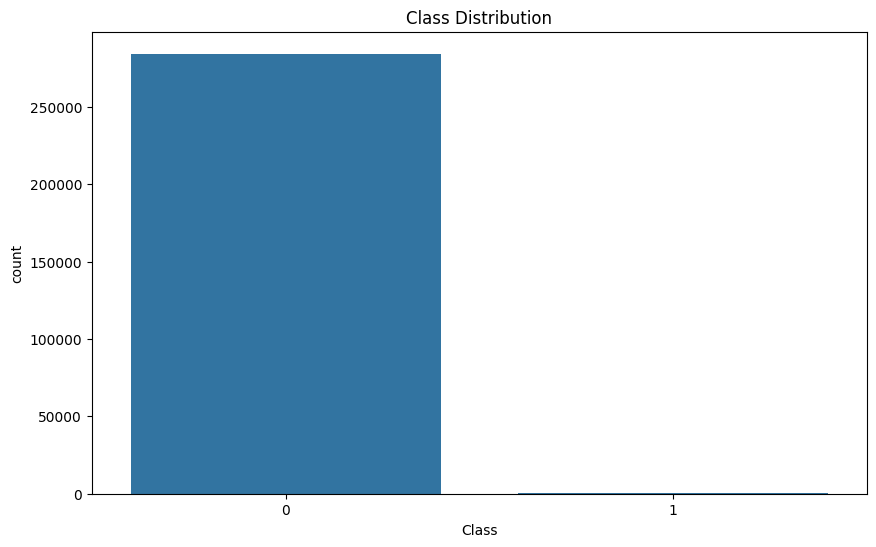

<ipython-input-16-d9d7503ba0c5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cd['Amount'])


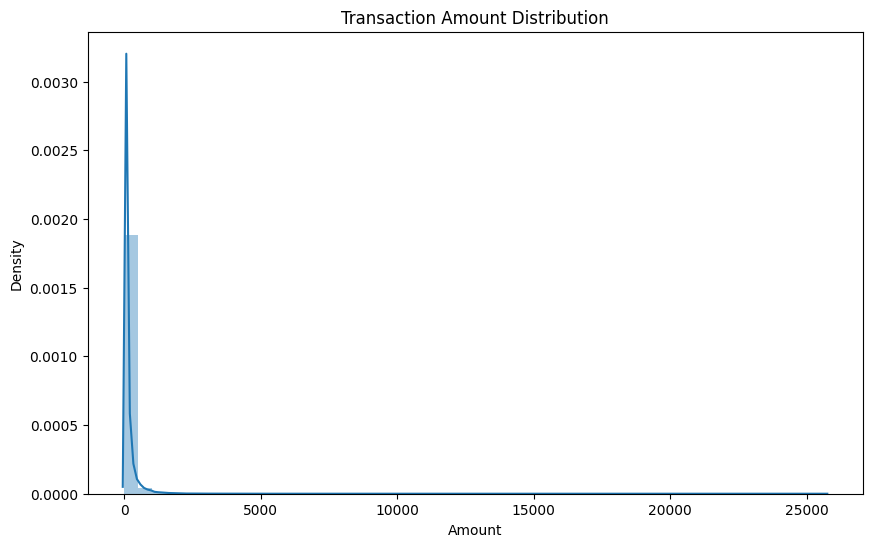

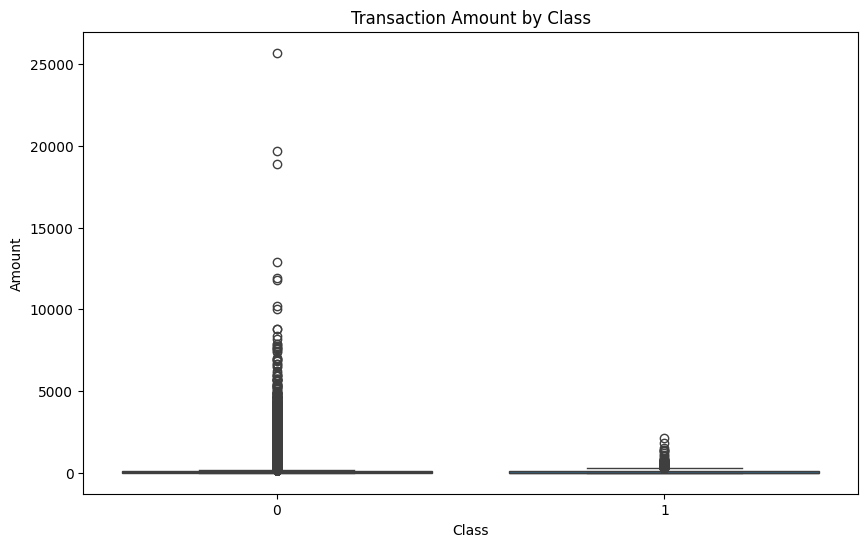

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=cd)
plt.title('Class Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(cd['Amount'])
plt.title('Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=cd)
plt.title('Transaction Amount by Class')
plt.show()

In [21]:
X = cd.drop('Class', axis=1)
y = cd['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
models = [
    LogisticRegression(class_weight=class_weights_dict),
    DecisionTreeClassifier(class_weight=class_weights_dict),
    RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict)
]

for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)

    # Eval
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    print(f'AUC-ROC: {auc:.3f}')
    print('---')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.991
Precision: 0.158
Recall: 0.918
F1-score: 0.270
AUC-ROC: 0.955
---
Model: DecisionTreeClassifier
Accuracy: 0.998
Precision: 0.450
Recall: 0.776
F1-score: 0.569
AUC-ROC: 0.887
---
Model: RandomForestClassifier
Accuracy: 1.000
Precision: 0.875
Recall: 0.857
F1-score: 0.866
AUC-ROC: 0.928
---


[[56852    12]
 [   14    84]]


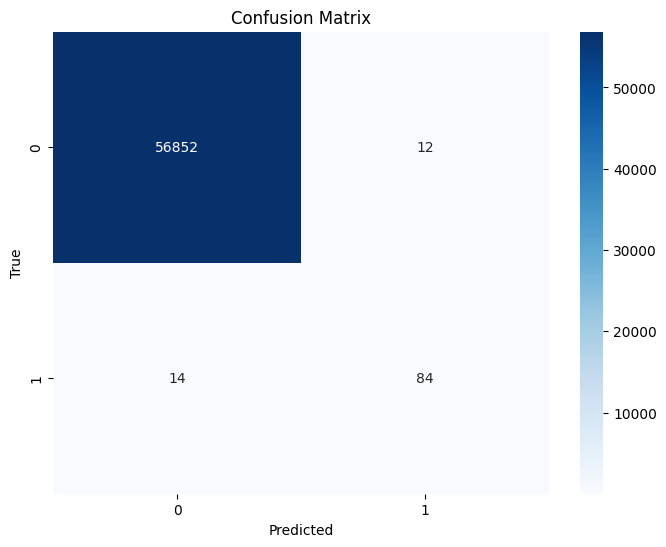

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


X = cd.drop('Class', axis=1)
y = cd['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
models = [
    LogisticRegression(class_weight=class_weights_dict),
    DecisionTreeClassifier(class_weight=class_weights_dict),
    RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict)
]

for model in models:
    model_name = model.__class__.__name__
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    accuracy_scores = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='precision')
    recall_scores = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='recall')
    f1_scores = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='f1')
    auc_scores = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='roc_auc')

    # Calculate the mean and standard deviation of each score
    accuracy_mean = accuracy_scores.mean()
    accuracy_std = accuracy_scores.std()
    precision_mean = precision_scores.mean()
    precision_std = precision_scores.std()
    recall_mean = recall_scores.mean()
    recall_std = recall_scores.std()
    f1_mean = f1_scores.mean()
    f1_std = f1_scores.std()
    auc_mean = auc_scores.mean()
    auc_std = auc_scores.std()

    # Print the cross-validation results
    print(f'Cross-Validation Results for {model_name}:')
    print(f'Accuracy: {accuracy_mean:.3f} ± {accuracy_std:.3f}')
    print(f'Precision: {precision_mean:.3f} ± {precision_std:.3f}')
    print(f'Recall: {recall_mean:.3f} ± {recall_std:.3f}')
    print(f'F1-score: {f1_mean:.3f} ± {f1_std:.3f}')
    print(f'AUC-ROC: {auc_mean:.3f} ± {auc_std:.3f}')
    print('---')

    # Train the model on the entire training set
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)

    # Eval
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    print(f'AUC-ROC: {auc:.3f}')
    print('---')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Results for LogisticRegression:
Accuracy: 0.980 ± 0.000
Precision: 0.992 ± 0.000
Recall: 0.967 ± 0.000
F1-score: 0.979 ± 0.000
AUC-ROC: 0.997 ± 0.000
---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.991
Precision: 0.158
Recall: 0.918
F1-score: 0.270
AUC-ROC: 0.955
---


In [ ]:
# prompt: perform feature engineering based on the results

# Based on EDA, engineer features that might improve model performance

# Interaction terms
cd['V1_V2'] = cd['V1'] * cd['V2']
cd['V1_V3'] = cd['V1'] * cd['V3']
# ... add more interaction terms as needed ...

# Polynomial features
cd['Amount_sq'] = cd['Amount'] ** 2
cd['Amount_cube'] = cd['Amount'] ** 3
# ... add more polynomial features as needed ...

# Time-based features
cd['Time_sin'] = np.sin(cd['Time'])
cd['Time_cos'] = np.cos(cd['Time'])

# Re-split data and re-train models with the new features
X = cd.drop(['Class'], axis=1)
y = cd['Class']
# ... (repeat the steps of scaling, model training, and evaluation) ...
